# Inferential Statistics
menggunakan statistics dan data tipe sample untuk menarik konklusi tentang populasi data tersebut.
- Confidence Interval
- Hypotesis Testing

## Terminologi
- Probability Distribution: grafik yang menunjukkan distribusi probabilitas terjadinya sebuah random variable --> Membuat grafik antara x-axis kasus, y-axis probabilitas
- Random Variable: satu titik data yang bisa muncul dari sebuah situasi/sample data
    - Discrete RV: angka bulat, misal hasi lempar dadu 1,2,3,4,5,6 (6 kasus), probability mass function
    - Continuous RV: angka tidak bulat, misal tinggi badan, bisa di antara 0-300cm (infinite kasus), probability density function

# Probability Distribution
dari data yang kita kumpulkan, kita bisa buat histogramnya, melihat trend probabilitas mendapatkan sebuah value. bentuk tertentu menunjukkan datanya tersebar dengan cara tertentu. yang umum:
- uniform distribution
- normal distribution
- binomial distribution (special case bernoulli distribution)

In [84]:
# import package
# untuk generate dummy data dengan bentuk distribusi tertentu
from scipy.stats import uniform, norm, binom

# untuk visualisasi
# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

# for inline plots in jupyter
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
# for latex equations
from IPython.display import Math, Latex
# for displaying images
from IPython.core.display import Image

# untuk import dan manipulasi data
import numpy as np
import pandas as pd

# untuk menghitung pvalue saat hypothesis testing
import statsmodels.api as sm
# untuk menghitung pvalue dari t test
import scipy.stats.distributions as dist

## Uniform Distribution
kita akan membuat dummy data untuk sebuah jenis data yang harusnya membentuk uniform distribution. misalnya hasil lempar dadu 6 sisi.

In [13]:
# buat dummy data yang berdistribusi uniform
data_uniform = uniform.rvs(size=10000, loc=1, scale=5)

print(data_uniform.min(), data_uniform.max(), len(data_uniform))

1.0000406978278755 5.998690571300716 10000


Text(0.5, 0, 'Random Variable')

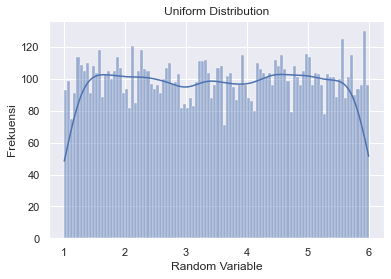

In [16]:
# berapa sih probabilitas mendapatkan setiap random variable yang ada di dummy data
sns.histplot(data_uniform, kde=True, bins=100)

plt.title("Uniform Distribution")
plt.ylabel("Frekuensi")
plt.xlabel("Random Variable")

perhatikan kalau di sebuah uniform distribution bentuk grafik distribusinya punya trend rata, karena kemungkinan mendapatkan sebuah random variable sama semua, tak ada yang lebih mungkin, atau yg lebih tidak mungkin.

# Normal Distribution
saat kemungkinan dapat random variable mendekati sebuah rata2, lalu mendapat value yang menjauh dari rata2 semakin kecil

In [18]:
# buat dummy data normal distribution
data_normal = norm.rvs(size=10000, loc=170, scale=5)

print(data_normal.min(), data_normal.max(), len(data_normal))

152.2012720821744 189.6484494644889 10000


Text(0.5, 0, 'Random Variable')

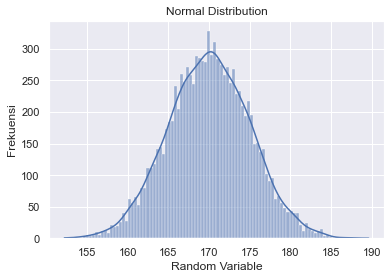

In [19]:
# visualisasi, grafik distribution nya
sns.histplot(data_normal, kde=True, bins=100)

plt.title("Normal Distribution")
plt.ylabel("Frekuensi")
plt.xlabel("Random Variable")

# Binomial Distribution
saat cuma ada 2 pilihan (fanta/cola). datanya misal 10rb orang, setiap orang boleh pilih 10 kali, kemungkinan mereka memilih pilihan cola adalah 80%:

In [21]:
# buat data dummy
data_binom = binom.rvs(size=10000, p=0.8, n=10)

print(data_binom.min(), data_binom.max(), len(data_binom))

3 10 10000


Text(0.5, 0, 'Random Variable')

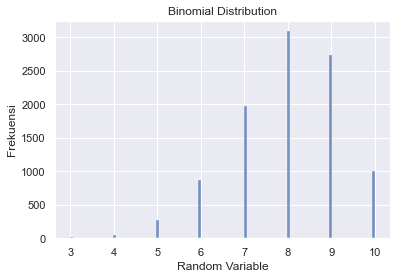

In [23]:
# visualisasi, grafik distribution nya
sns.histplot(data_binom, bins=100)

plt.title("Binomial Distribution")
plt.ylabel("Frekuensi")
plt.xlabel("Random Variable")

# Bernoulli distribution
tipe Binomial Distribution spesial dimana setiap orang boleh pilih 1 saja

0 1 10000


Text(0.5, 0, 'Random Variable')

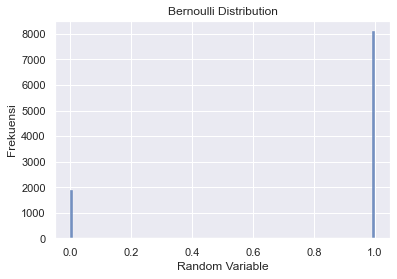

In [24]:
data_bernoulli = binom.rvs(size=10000, p=0.8, n=1)

print(data_bernoulli.min(), data_bernoulli.max(), len(data_bernoulli))

sns.histplot(data_bernoulli, bins=100)

plt.title("Bernoulli Distribution")
plt.ylabel("Frekuensi")
plt.xlabel("Random Variable")

# Confidence Interval
kita mau membuat statement berdasarkan data yang kita punya (sample) dan berdasarkan teknik statistik.

Dua jenis statement:
- mean (rata-rata)
- proportion (persentase)

mean: dari data 10rb pria Semarang, kita bisa bilang kalau rata-rata tinggi pria Semarang ada di antara [170-180cm]   
proportion: [70%-80%] pria Semarang tingginya ada di atas 165cm

### Formula
Best Estimate +- Margin of Error   
be +- me   

contoh mean di atas, be = 175 dengan me = 5   
kalau proporsi, be = 0.75 dengan me = 0.05    

level keyakinan (biasanya di 95%) --> menentukan angka z-score. angka z kita gunakan untuk mencari Margin of Error

Margin of Error = z-score * Standard Error

### Mean Confidence Interval
- be +- me
- be = mean
- me = z * se
- z = 1.96 (kalau tingkat yakin 95%)
- se = std / np.sqrt(jumlah_data)

### Proportion Confidence Interval
- be +- me
- be = p
- me = z * se
- z = 1.96 (kalau tingkat yakin 95%)
- se = np.sqrt(p * (1-p) / jumlah_data)

## Case 1: proporsi wanita yang punya sakit jantung dari Heart.csv
Proportion Confidence Interval

In [27]:
# import data
df = pd.read_csv("dataset/Heart.csv")
display(df.head())
print(df.shape)

# kolom "sex" 1 = male; 0 = female
# kolom "target" 0 = no disease and 1 = disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


(1025, 14)


In [29]:
df['gender'] = df['sex'].replace({1:"Pria", 0:"Wanita"})
df['label'] = df['target'].replace({0:"sehat", 1:"sakit"})

df_heart = df[['gender','label']]
df_heart

,gender,label
0,Pria,sehat
1,Pria,sehat
2,Pria,sehat
3,Pria,sehat
4,Wanita,sehat
...,...,...
1020,Pria,sakit
1021,Pria,sehat
1022,Pria,sehat
1023,Wanita,sakit


In [31]:
# cek missing value
df_heart.isnull().sum()

gender    0
label     0
dtype: int64

In [33]:
# teknik crosstab
pd.crosstab(df_heart['gender'], df_heart['label'])

label,sakit,sehat
gender,,
Pria,300,413
Wanita,226,86


In [34]:
# proporsi wanita yang punya sakit jantung?
n = 226 + 86  # total wanita
p = 226 / n   # proporsi wanita yang sakit jantung


be = p
z = 1.96 #tingkat yakin 95%
se = np.sqrt(p * (1-p) / n)
me = z * se

print((be - me, be + me))

(0.6747765651256307, 0.773941383592318)


67-77% wanita memiliki sakit jantung

## Case 2: rata2 cholesterol wanita
Mean confidence interval

In [35]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,gender,label
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Pria,sehat
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Pria,sehat
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Pria,sehat
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Pria,sehat
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Wanita,sehat


In [36]:
df_chol = df[['gender','chol']]
df_chol

,gender,chol
0,Pria,212
1,Pria,203
2,Pria,174
3,Pria,203
4,Wanita,294
...,...,...
1020,Pria,221
1021,Pria,258
1022,Pria,275
1023,Wanita,254


In [37]:
# pakai teknik groupby dan aggregate untuk cari mean, count, dan std dev
df_chol.groupby("gender").agg({"chol": [np.mean, np.std, np.size]})

chol                
              mean        std size
gender                            
Pria    239.237027  43.155535  713
Wanita  261.455128  64.466781  312

In [38]:
# rata2 cholesterol wanita
be = 261.455128

z = 1.96 # tingkat yakin 95%
se = 64.466781 / np.sqrt(312)
me = z * se

print((be - me, be + me))

(254.30169095203016, 268.6085650479699)


rata2 kolesterol wanita ada di level 254-269

### latihan
- cari confidence interval untuk rata rata tingkat cholesterol pria
- cari confidence interval untuk proporsi pria yang kolesterol ada di atas 230

In [56]:
df = pd.read_csv("dataset/Heart.csv")
# kolom "sex" 1 = male; 0 = female

df_chol = df[['sex','chol']] 
df_chol_pria = df_chol[df_chol['sex'] == 1]
df_chol_pria = df_chol_pria['chol']
df_chol_pria

# mean, count, std dev
mean, n, std = (df_chol_pria.mean(), df_chol_pria.count(), df_chol_pria.std())

print(mean, n, std)

be = mean

z = 1.96
se = std / np.sqrt(n)
me = z * se

print((be - me, be + me))

239.23702664796633 713 43.15553498840588
(236.06929917427126, 242.4047541216614)


rata rata kolesterol pria ada di antara 236-242

# Hypothesis Testing
karena data kita sample, kita mau tau apakah data kita ini bisa dibilang beda secara signifikan dari ...

- tingkat kolesterol pria ada di atas 230
- proporsi pria yang sakit jantung ada lebih dari 35%
- pasien terapi 2x seminggu sembuh lebih lama daripada terapi 3x seminggu
    - yang terapi 3x seminggu (dari data) biasanya sembuh dalam 8.2 bulan
    - yang terapi 2x seminggu asumsi kita adalah sembuh > 8.2 bulan --> H1: u > 8.2
    - null Hypothesis H0: u <= 8.2? apakah u berbeda secara signifikan dari 8.2? kalau iya
    
## Terminologi
- alternate hypothesis
- null hypothesis
- alpha: level keyakinan kita, berapa % erorrnya, misal yakin 95%, maka alpha adalah 5% atau 0.05
- p-value: sebuah nilai yang bisa menentukan halau null hypothesis kita beda signifikan atau tidak
    - p-value < alpha, maka bedanya signifikan. kita FAIL to reject null hypothesis.
    - p-value > alpha, maka bedanya tidak signifikan. Kita REJECT null hypothesis.

# One Population Proportion
satu set data (set data pria), untuk membuat statement tentang proporsi (persentase)

Contoh statement: proporsi pria yang sakit jantung ada lebih dari 35%

dataset: populasi pria dan kolom yang memberi tau sakit/sehat

hitung: proporsi pria yang sakit jantung (phat), jumlah pria di dataset kita

H0: p <= 0.35   
H1: p > 0.35

In [65]:
df['gender'] = df['sex'].replace({1:"Pria", 0:"Wanita"})
df['label'] = df['target'].replace({0:"sehat", 1:"sakit"})

df_pria = df[df['gender'] == "Pria"]

n = len(df_pria)
n_sakit = len(df_pria[df_pria["label"] == "sakit"])
phat = n_sakit / total_pria
pnull = 0.35

print(n, n_sakit, phat, pnull)

713 300 0.42075736325385693 0.35


In [68]:
# tentukan alpha, misal yakin 95%, error rate 5%, alpha 0.05
alpha = 0.05

# kita cari p-value pakai bantuan statsmodels
zstat, pvalue = sm.stats.proportions_ztest(phat * n, n, pnull, alternative='larger')
print(pvalue)

6.482982897740179e-05


In [69]:
if (pvalue < alpha):
    print("REJECT null hypothesis. Ada perbedaan signifikan antara phat dengan pnull. Proporsi pria yang sakit jantung > 35%")
else:
    print("FAIL to reject null hypothesis. Perbedaan tidak signifikan, kita tidak yakin apakah proporsi pria yang sakit jantung > 35%")

REJECT null hypothesis. Ada perbedaan signifikan antara phat dengan pnull. Proporsi pria yang sakit jantung > 35%


# Difference in Population Means
apakah level kolesterol pria lebih rendah daripada level kolesterol wanita?

H1: u_p < u_w   
H0: u_p == u_w

kita akan perlu means dan standard deviation untuk level kolesterol pria dan wanita.

setelah itu kita gunakan sm.stats.ztest untuk mendapat pvalue nya

In [80]:
df_chol = df[['chol','gender']]

df_chol_pria = df_chol[df_chol['gender']=='Pria']

df_chol_wanita = df_chol[df_chol['gender']=='Wanita']

print("kolesterol pria, mean:", df_chol_pria['chol'].mean(), "std:", df_chol_pria['chol'].std())
print("kolesterol wanita, mean:", df_chol_wanita['chol'].mean(), "std:", df_chol_wanita['chol'].std())

kolesterol pria, mean: 239.23702664796633 std: 43.15553498840588
kolesterol wanita, mean: 261.45512820512823 std: 64.46678079217995


In [82]:
# hitung pvalue
zstat, pvalue = sm.stats.ztest(df_chol_pria['chol'], df_chol_wanita['chol'], alternative="two-sided")
print(pvalue)

9.827887332708898e-11


In [83]:
# pilih alpha
alpha = 0.05

if (pvalue < alpha):
    print("REJECT null hypothesis. Ada perbedaan signifikan antara level kolesterol pria dan level kolesterol wanita. level kolesterol pria < level kolesterol wanita")
else:
    print("FAIL to reject null hypothesis. Perbedaan tidak signifikan, level kolesterol pria dan wanita sepertinya sama saja")

REJECT null hypothesis. Ada perbedaan signifikan antara level kolesterol pria dan level kolesterol wanita. level kolesterol pria < level kolesterol wanita


# One Population Proportion (tapi pakai Test Statistic)
saat jumlah data kita ada 30 atau lebih sedikit, tidak boleh menggunakan ztest. kita pakai teknik t test.

In [88]:
df_small = df[df['gender']=="Pria"].head(30)
df_small.shape # data 30 pria

(30, 16)

proporsi pria yang sakit jantung ada lebih dari 35%

dataset: populasi pria dan kolom yang memberi tau sakit/sehat (cuma ada 30 titik data)

hitung: proporsi pria yang sakit jantung (phat), jumlah pria di dataset kita
 
H0: p <= 0.25  
H1: p > 0.25

In [95]:
phat = 0.25

n = len(df_small)
n_sakit = len(df_small[df_small['label']=='sakit'])
p = n_sakit / n

print(phat, p, n)

0.25 0.3333333333333333 30


In [96]:
# cari test stat
be = p
he = phat
se = np.sqrt(phat * (1-phat) / n)

tstat = (be - he) / se

print(tstat)

1.0540925533894596


In [97]:
# cari pvalue
pvalue = 2*dist.norm.cdf(-np.abs(tstat))

print(pvalue)

0.29184054514378865


In [99]:
# pilih alpha
alpha = 0.05

if (pvalue < alpha):
    print("REJECT null hypothesis. Ada perbedaan signifikan antara proporsi pria yang sakit jantung dengan 25%")
else:
    print("FAIL to reject null hypothesis. Perbedaan tidak signifikan, level pria yang sakit jantung tidak berbeda dengan 25%")

FAIL to reject null hypothesis. Perbedaan tidak signifikan, level pria yang sakit jantung tidak berbeda dengan 25%


### latihan
- dari data heart.csv, coba test apakah jumlah wanita yang level kolesterol di atas 200 ada lebih dari 50%